## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Analysis

In [4]:
df = pd.read_csv("diabetes.csv")


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Shape of Dataset

In [7]:
df.shape

(768, 9)

## Statistical Analysis

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### (Diabetes Prediction)

- **0** → Person does **not** have diabetes  
- **1** → Person **has** diabetes  

The model’s accuracy shows the proportion of correct predictions when comparing
predicted outcomes with actual outcomes.


In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Seaprting Data and labels

In [14]:
X = df.drop(columns='Outcome', axis = 1)  # If we drop the column axis=1--->If we drop Row axis=0
Y = df["Outcome"]

In [15]:
## Print X --> features 
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
## Print Y --> Output That check it dibatic patient or not
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Data Standardization

###  (Feature Scaling)

Data standardization is a feature scaling technique that transforms all input
features to a similar scale, typically with:

- Mean = 0  
- Standard Deviation = 1  

This helps machine learning models learn faster and perform better, especially
when features have different ranges.


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scalar = StandardScaler()

In [21]:
scalar.fit(X)

StandardScaler()

In [22]:
standardized_data = scalar.transform(X)

In [23]:
# Print Data
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [24]:
X = standardized_data
Y = df["Outcome"]

In [25]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [26]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
print("Mean of each feature:", np.mean(X, axis=0))
print("Standard deviation of each feature:", np.std(X, axis=0))


Mean of each feature: [-6.47630098e-17 -9.25185854e-18  1.50342701e-17  1.00613962e-16
 -3.00685403e-17  2.59052039e-16  2.45174251e-16  1.93132547e-16]
Standard deviation of each feature: [1. 1. 1. 1. 1. 1. 1. 1.]


After standardization:
- Feature mean ≈ **0**
- Feature standard deviation ≈ **1**

Very small values such as `e-16` or `e-17` are considered **0** due to floating-point precision and do not indicate an error.


## Train Test Splitting

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape)   #orignal dataset
print(X_train.shape) # Train data
print(X_test.shape)  # Testing Data

(768, 8)
(614, 8)
(154, 8)


## Training Model

In [34]:
from sklearn import svm

In [35]:
classifier = svm.SVC(kernel='linear')

In [36]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evalution

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7719869706840391


In [41]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


## Prediction

In [44]:
import warnings
warnings.filterwarnings('ignore')


In [45]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scalar.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


## Visulization

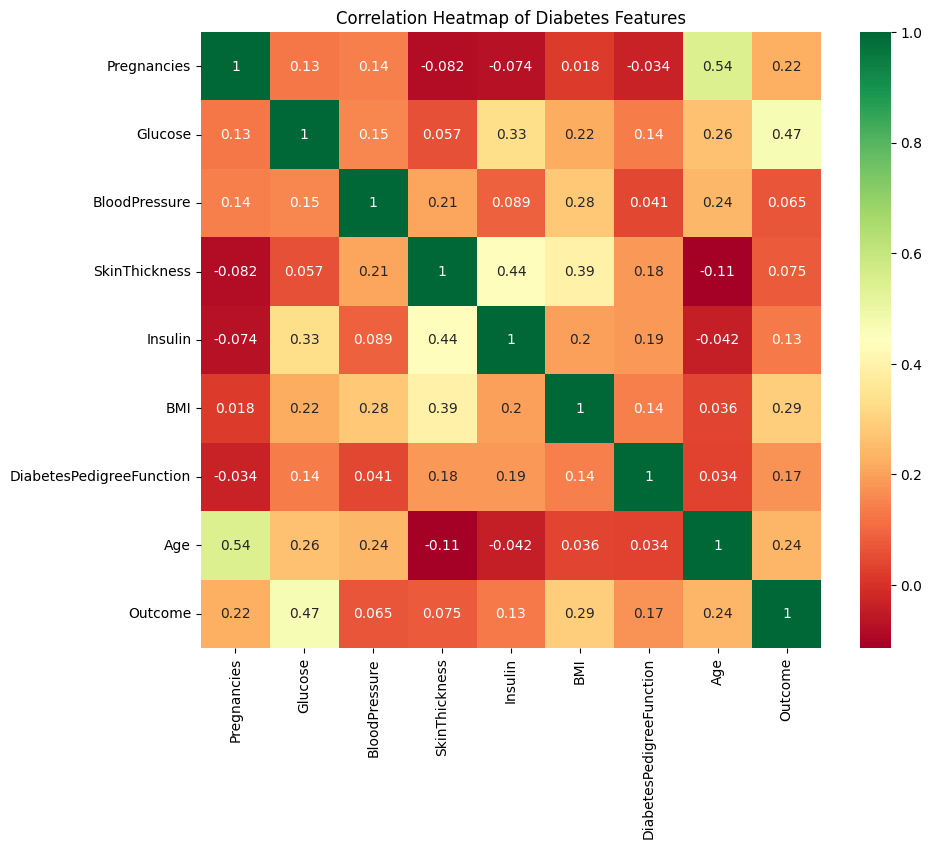

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap of Diabetes Features')
plt.show()


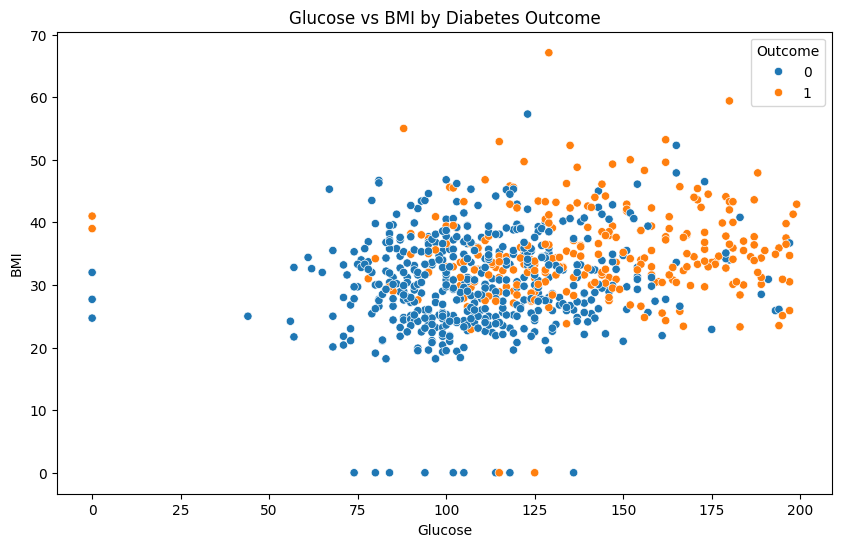

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.show()


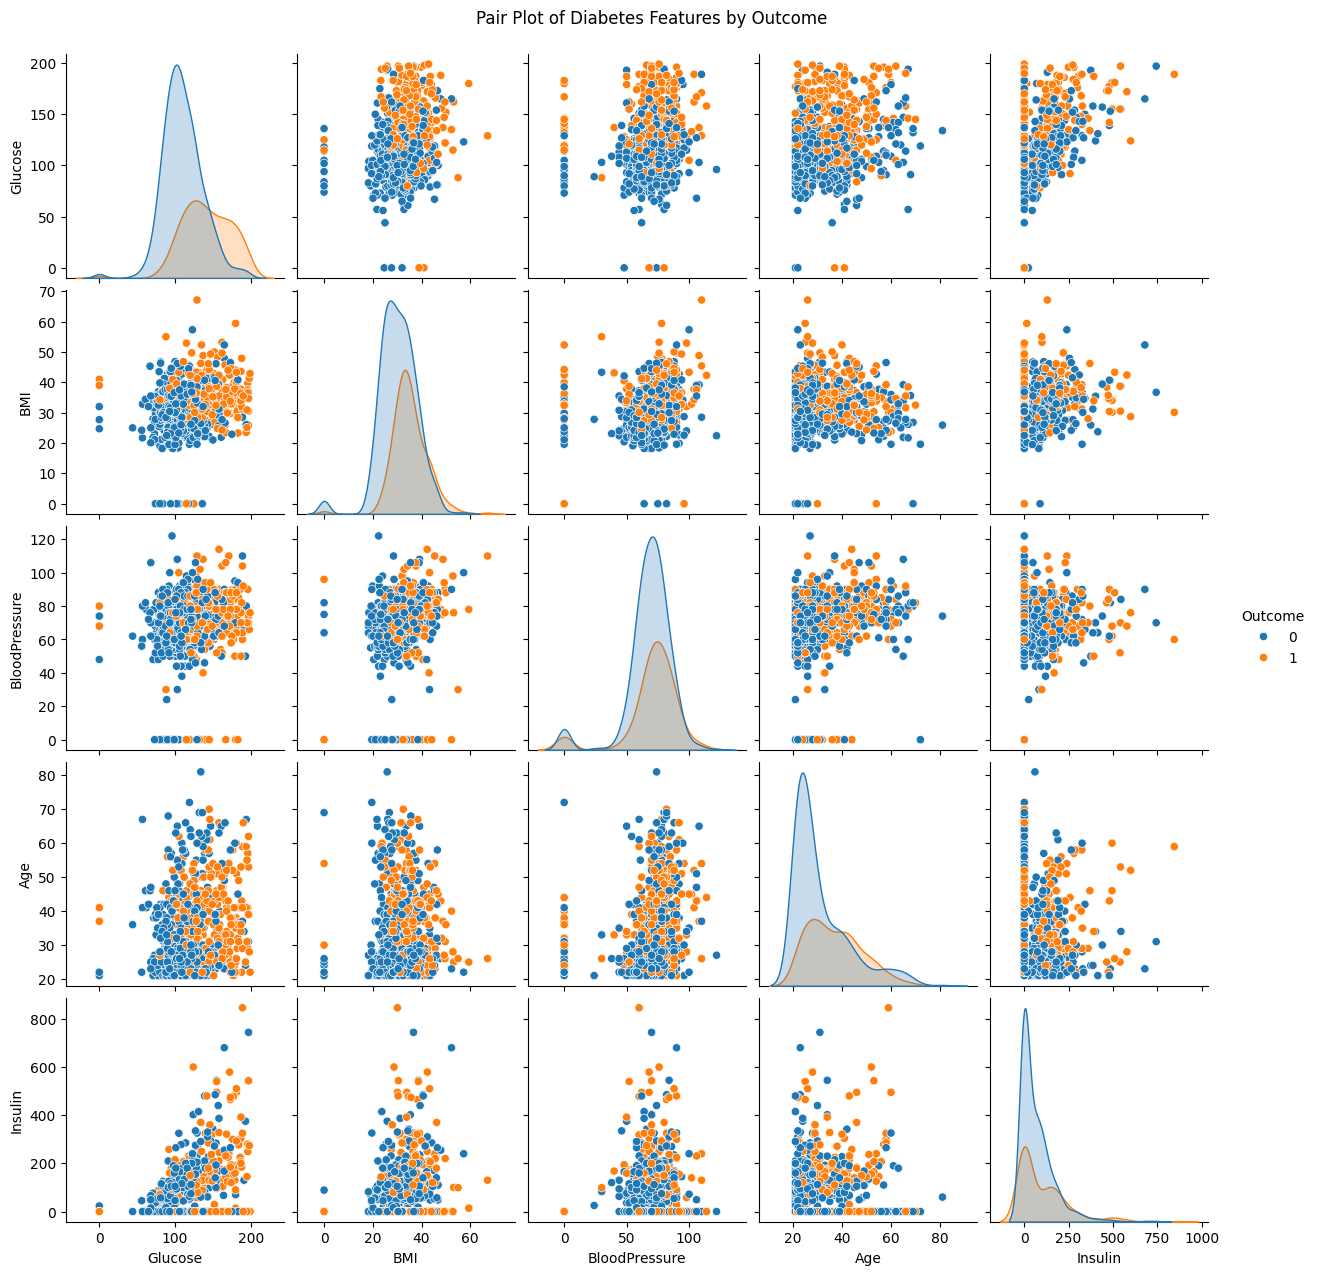

In [49]:
# selection of features, colored by Outcome
sns.pairplot(df, vars=['Glucose', 'BMI', 'BloodPressure', 'Age', 'Insulin'], hue='Outcome')
plt.suptitle('Pair Plot of Diabetes Features by Outcome', y=1.02) # Add a title
plt.show()


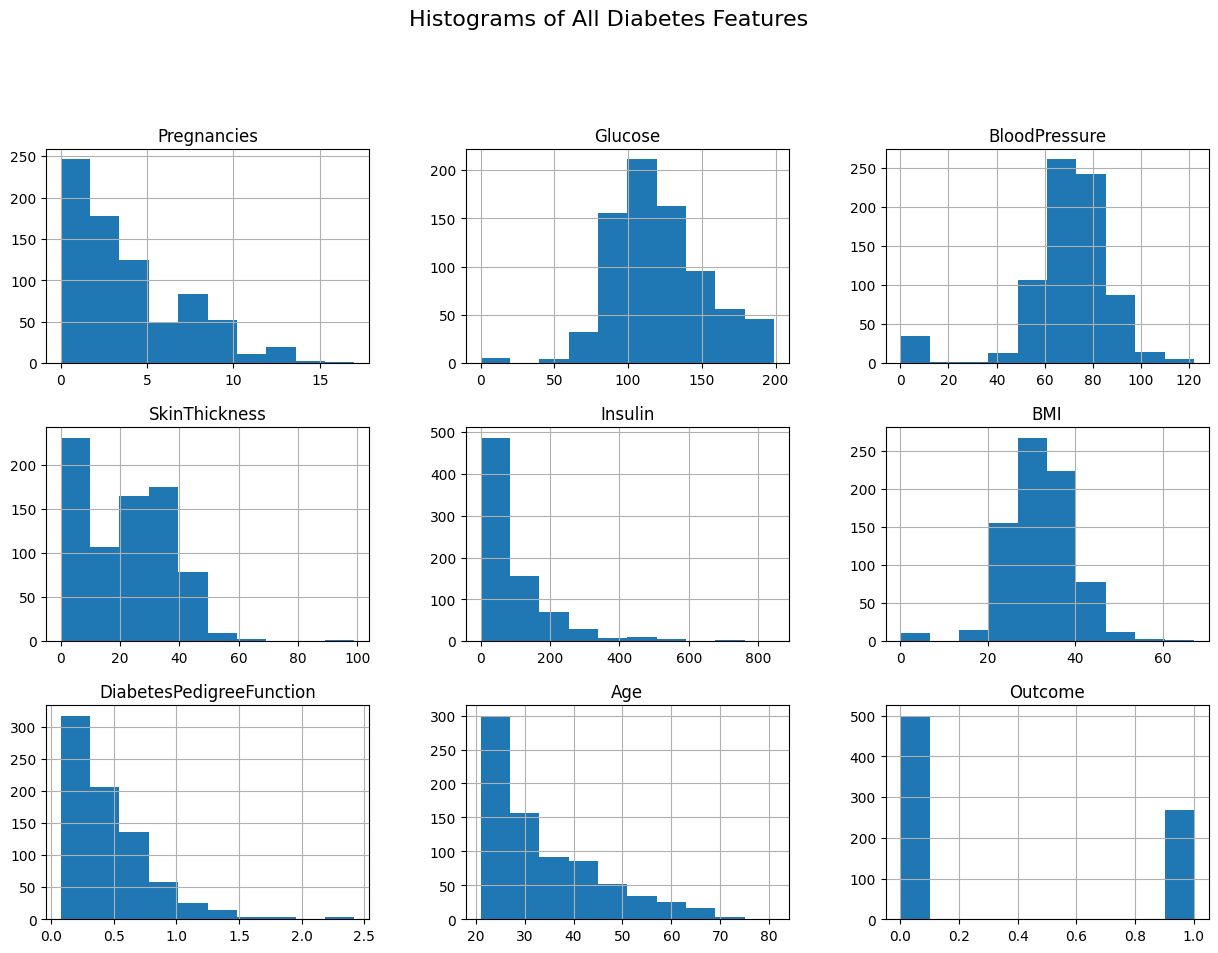

In [50]:
# all numerical features in the DataFrame
df.hist(bins=10, figsize=(15, 10))
plt.suptitle('Histograms of All Diabetes Features', y=1.02, fontsize=16)
plt.show()


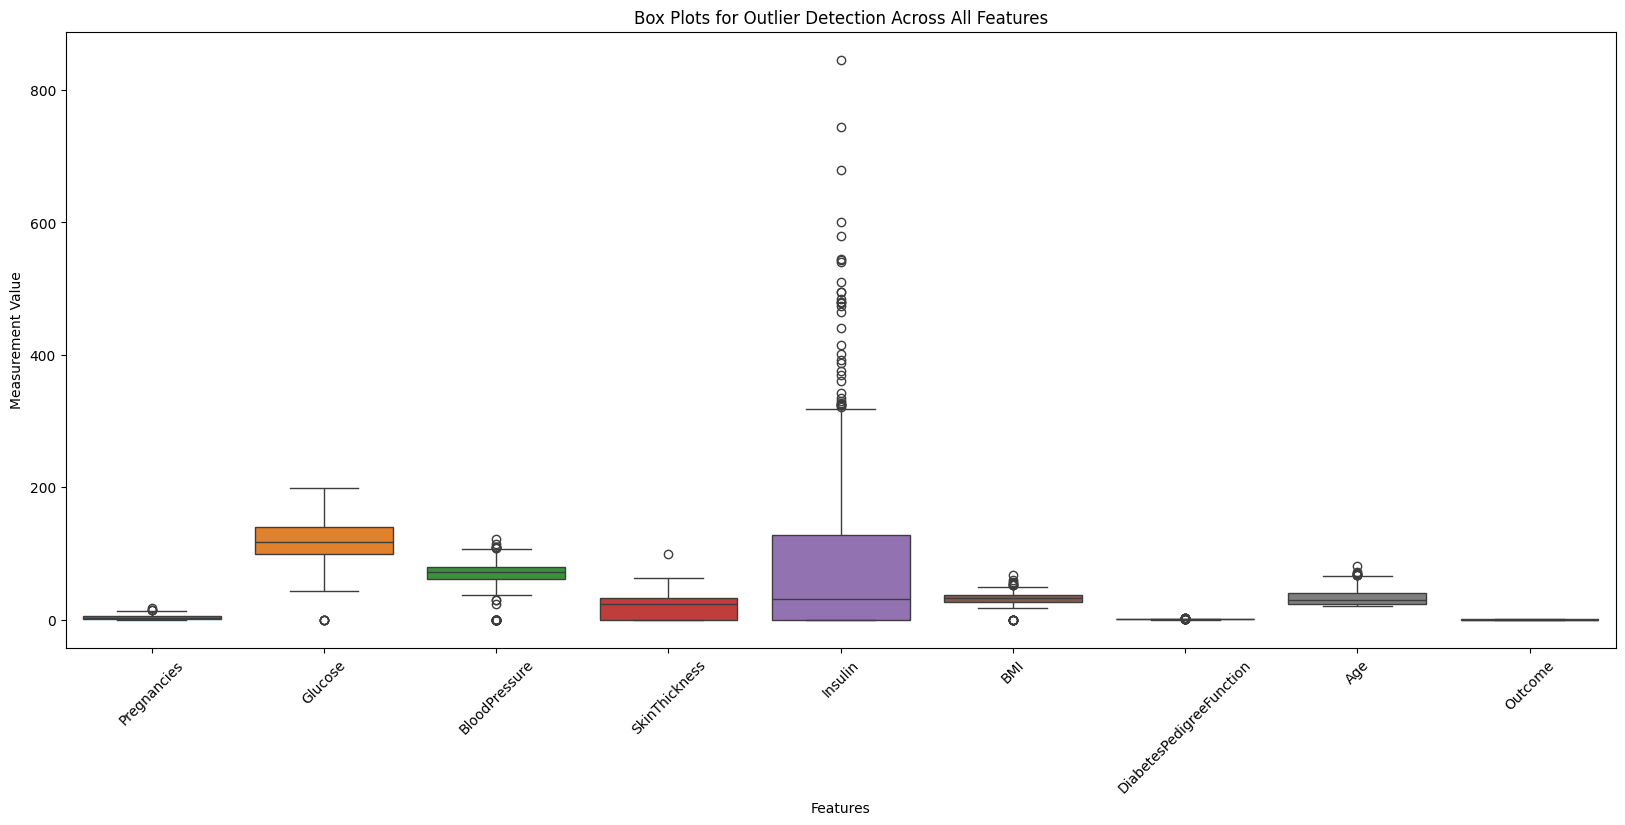

In [51]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title('Box Plots for Outlier Detection Across All Features')
plt.ylabel('Measurement Value')
plt.xlabel('Features')
plt.xticks(rotation=45) # Rotate labels for readability
plt.show()
